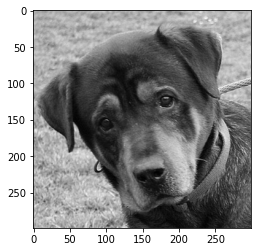

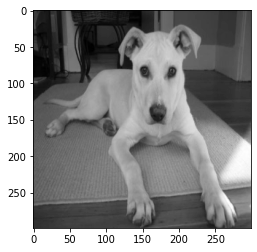

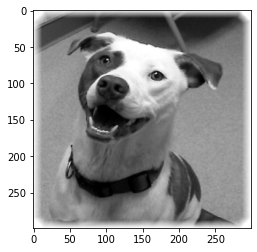

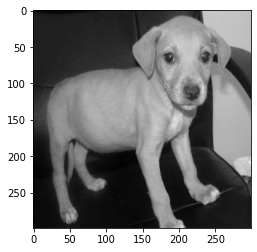

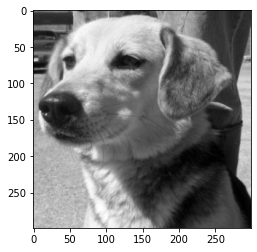

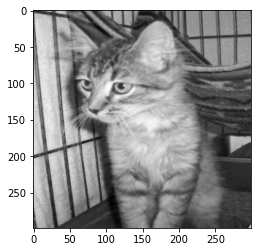

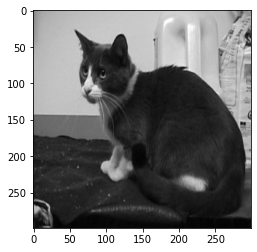

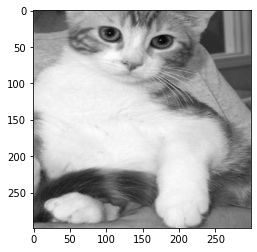

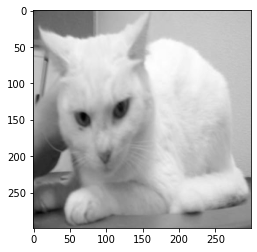

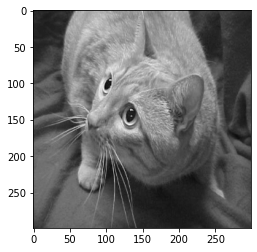

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = ".\\"

CATEGORIES = ["Dog", "Cat"]

IMG_SIZE = 299

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        plt.imshow(new_array, cmap='gray')  # graph it
        plt.show()  # display!

In [60]:
from tqdm import tqdm
training_data = []
CATEGORIES = ["Dog", "Cat"]
DATADIR = ".\\"
IMG_SIZE = 299

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 5/5 [00:00<00:00, 626.13it/s]10



In [61]:
import random

random.shuffle(training_data)

In [62]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
0
1
0
1
0
0


In [63]:
X = []
y = []

In [64]:
import numpy as np
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 53]
   [ 57]
   [ 46]
   ...
   [149]
   [130]
   [102]]

  [[ 62]
   [ 60]
   [ 48]
   ...
   [163]
   [139]
   [101]]

  [[ 74]
   [ 70]
   [ 57]
   ...
   [143]
   [137]
   [113]]

  ...

  [[143]
   [108]
   [ 65]
   ...
   [ 65]
   [167]
   [200]]

  [[136]
   [108]
   [ 67]
   ...
   [138]
   [191]
   [205]]

  [[127]
   [107]
   [ 71]
   ...
   [180]
   [200]
   [202]]]]


In [65]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [66]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)